In [1]:
import pandas as pd
import jellyfish
import matplotlib.pyplot as plt
import numpy as np
from random import random, choice ,uniform

%matplotlib inline

In [2]:
df = pd.read_csv('A_NoisySet')
df = df.drop(df.columns[[0]] , 1)
df

,STD_Months,10_Percent,20_Percent,30_Percent,40_Percent,50_Percent,60_Percent,70_Percent,80_Percent,90_Percent,100_Percent
0,September,qeptember,Seutsmber,geptombeu,nepqemcew,Seqtekyes,erbtesbew,ecmtemznr,Ssoheiivp,kdirzubid,vdomntnrh
1,January,Jaluary,xanuary,banuany,Jantvny,tpnzbry,Jqruwrn,nqvaaoy,raebtly,djnyagv,ykcququ
2,April,Aprhl,Aprig,Awiil,bprkl,Aplxf,cprta,upyyp,Aklsv,wcbjp,scvum
3,March,iarch,Morch,uakch,Mirgh,vaach,jamcw,rxgeh,fhich,iqovu,zcbcj
4,September,neptember,Scptgmber,oeptembna,neptxnrer,Sfoeerbdr,Snmterbya,Seigenbdr,aezilfsei,cascqmdvr,rhazmcowx
5,April,Aprtl,Apgil,Ajrzl,apoil,yprpp,oproj,bpgwn,vplum,lfmjj,hmjud
6,December,becember,Dtcepber,Degembek,defepber,Dcaembod,Dehagbga,sicymhug,Dvkrwsir,jlzsmlkp,wddccwkh
7,November,Novembxr,Novesbor,Nuvelber,Nhntmber,rovlmbxf,Nlvesjas,fncenllr,Noymtqsl,arhetefi,xxrcjynf
8,January,zanuary,Jansary,sanucry,Jenukpy,yyniary,pfnutre,varkjrp,kvcksru,mpqufov,sryvywk
9,March,Marcn,Makch,Marcj,Maxci,jcvch,Mbtcg,rahwc,brrar,mxmpj,eyawb


In [3]:
colnames=list(df.columns.values)
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November" ,"December"   ] 
for x in colnames:
    if x!='STD_Months':
        col=x
        print(col)
        df[col+'_LD'] = ''
        ix = [(row) for row in range(df[col].shape[0])]
        for row in ix:
            print("row: " , row , '\n')
            ld_best = 20
            best_match = []
            for month in months:
                s1 = df[col].iat[row]
                print("s1: " , s1 )
                s2 = month        
                print("s2: " , s2)
                ld = jellyfish.levenshtein_distance(s1 , s2)
                print("LD :" , ld)
                
                if ld < ld_best:
                    print("======> LD Best Updated!\n")
                    ld_best = ld
                    del best_match[:]
                    best_match.append(s2)
                elif ld==ld_best:
                    print("======> Equal LD Best Added!\n")
                    best_match.append(s2)
                else:
                    pass
            print('best matches:',best_match)
            print('LD best:' , ld_best)
            selected = np.random.choice(best_match, 1)
            df[col+'_LD'].iat[row] = selected[0]
            print('Final Selection:' , selected[0])
            print("*******\n")       

10_Percent
row:  0 

s1:  qeptember
s2:  January
LD : 9
======> LD Best Updated!

s1:  qeptember
s2:  February
LD : 8
======> LD Best Updated!

s1:  qeptember
s2:  March
LD : 9
s1:  qeptember
s2:  April
LD : 8
======> Equal LD Best Added!

s1:  qeptember
s2:  May
LD : 9
s1:  qeptember
s2:  June
LD : 8
======> Equal LD Best Added!

s1:  qeptember
s2:  July
LD : 9
s1:  qeptember
s2:  August
LD : 9
s1:  qeptember
s2:  September
LD : 1
======> LD Best Updated!

s1:  qeptember
s2:  October
LD : 5
s1:  qeptember
s2:  November
LD : 4
s1:  qeptember
s2:  December
LD : 3
best matches: ['September']
LD best: 1
Final Selection: September
*******

row:  1 

s1:  Jaluary
s2:  January
LD : 1
======> LD Best Updated!

s1:  Jaluary
s2:  February
LD : 4
s1:  Jaluary
s2:  March
LD : 6
s1:  Jaluary
s2:  April
LD : 7
s1:  Jaluary
s2:  May
LD : 5
s1:  Jaluary
s2:  June
LD : 5
s1:  Jaluary
s2:  July
LD : 4
s1:  Jaluary
s2:  August
LD : 6
s1:  Jaluary
s2:  September
LD : 9
s1:  Jaluary
s2:  October
LD : 7
s1

In [4]:
df

,STD_Months,10_Percent,20_Percent,30_Percent,40_Percent,50_Percent,60_Percent,70_Percent,80_Percent,90_Percent,...,10_Percent_LD,20_Percent_LD,30_Percent_LD,40_Percent_LD,50_Percent_LD,60_Percent_LD,70_Percent_LD,80_Percent_LD,90_Percent_LD,100_Percent_LD
0,September,qeptember,Seutsmber,geptombeu,nepqemcew,Seqtekyes,erbtesbew,ecmtemznr,Ssoheiivp,kdirzubid,...,September,September,September,September,September,September,December,November,February,January
1,January,Jaluary,xanuary,banuany,Jantvny,tpnzbry,Jqruwrn,nqvaaoy,raebtly,djnyagv,...,January,January,January,January,January,January,May,July,January,July
2,April,Aprhl,Aprig,Awiil,bprkl,Aplxf,cprta,upyyp,Aklsv,wcbjp,...,April,April,April,April,April,April,July,April,July,May
3,March,iarch,Morch,uakch,Mirgh,vaach,jamcw,rxgeh,fhich,iqovu,...,March,March,March,March,March,March,March,March,March,March
4,September,neptember,Scptgmber,oeptembna,neptxnrer,Sfoeerbdr,Snmterbya,Seigenbdr,aezilfsei,cascqmdvr,...,September,September,September,September,September,September,September,September,December,March
5,April,Aprtl,Apgil,Ajrzl,apoil,yprpp,oproj,bpgwn,vplum,lfmjj,...,April,April,April,April,April,April,April,July,April,April
6,December,becember,Dtcepber,Degembek,defepber,Dcaembod,Dehagbga,sicymhug,Dvkrwsir,jlzsmlkp,...,December,December,December,December,December,December,December,April,December,March
7,November,Novembxr,Novesbor,Nuvelber,Nhntmber,rovlmbxf,Nlvesjas,fncenllr,Noymtqsl,arhetefi,...,November,November,November,November,November,November,December,November,March,March
8,January,zanuary,Jansary,sanucry,Jenukpy,yyniary,pfnutre,varkjrp,kvcksru,mpqufov,...,January,January,January,January,January,January,January,January,June,May
9,March,Marcn,Makch,Marcj,Maxci,jcvch,Mbtcg,rahwc,brrar,mxmpj,...,March,March,March,March,March,March,March,February,March,May


In [5]:
#Levenshtein Accuracy
from sklearn.metrics import accuracy_score

NameOfColumns = list(df)
LdAccuracy = []
for x in NameOfColumns:
    if "LD" in x:
        print("LD Accuracy : " , accuracy_score(df["STD_Months"] , df[x])) 
        LdAccuracy.append(accuracy_score(df["STD_Months"] , df[x]))
print(LdAccuracy)

LD Accuracy :  1.0
LD Accuracy :  0.991666666667
LD Accuracy :  1.0
LD Accuracy :  0.975
LD Accuracy :  0.958333333333
LD Accuracy :  0.941666666667
LD Accuracy :  0.758333333333
LD Accuracy :  0.558333333333
LD Accuracy :  0.375
LD Accuracy :  0.166666666667
[1.0, 0.9916666666666667, 1.0, 0.97499999999999998, 0.95833333333333337, 0.94166666666666665, 0.7583333333333333, 0.55833333333333335, 0.375, 0.16666666666666666]


In [6]:
import numpy as np
#Creating an empty DataFrame
columns = ['Original']
diff = pd.DataFrame(index=range(0,121) , columns=columns)
diff['Original'] = df['STD_Months']

#Iterate ove the transformed columns 
percentage = [10 , 20 ,30 ,  40 , 50 , 60 , 70 , 80 , 90 , 100]

for p in percentage:
    """Counting #of wrong transformations"""
    diff['Transformation_' + str(p)] = ''
    c = np.where(df['STD_Months'] != df[ str(p) +'_Percent_LD'])
    
    if len(c[0]) > 0 :    
        for x in np.nditer(c):        
            x = int(x)
            diff['Transformation_' + str(p)].iat[x] = df[ str(p) + '_Percent_LD'].iat[x]
diff

,Original,Transformation_10,Transformation_20,Transformation_30,Transformation_40,Transformation_50,Transformation_60,Transformation_70,Transformation_80,Transformation_90,Transformation_100
0,September,,,,,,,December,November,February,January
1,January,,,,,,,May,July,,July
2,April,,,,,,,July,,July,May
3,March,,,,,,,,,,
4,September,,,,,,,,,December,March
5,April,,,,,,,,July,,
6,December,,,,,,,,April,,March
7,November,,,,,,,December,,March,March
8,January,,,,,,,,,June,May
9,March,,,,,,,,February,,May


In [7]:
diff.sort(columns='Original')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Original,Transformation_10,Transformation_20,Transformation_30,Transformation_40,Transformation_50,Transformation_60,Transformation_70,Transformation_80,Transformation_90,Transformation_100
86,April,,,,,,,,,March,May
87,April,,,,,,,March,,July,
23,April,,,,,,,June,,May,March
20,April,,,,,,,,,July,June
12,April,,,,,,,March,,,July
102,April,,,,,,,March,,,August
60,April,,,,,,,March,March,June,
5,April,,,,,,,,July,,
2,April,,,,,,,July,,July,May
51,April,,,,,,,July,,June,July


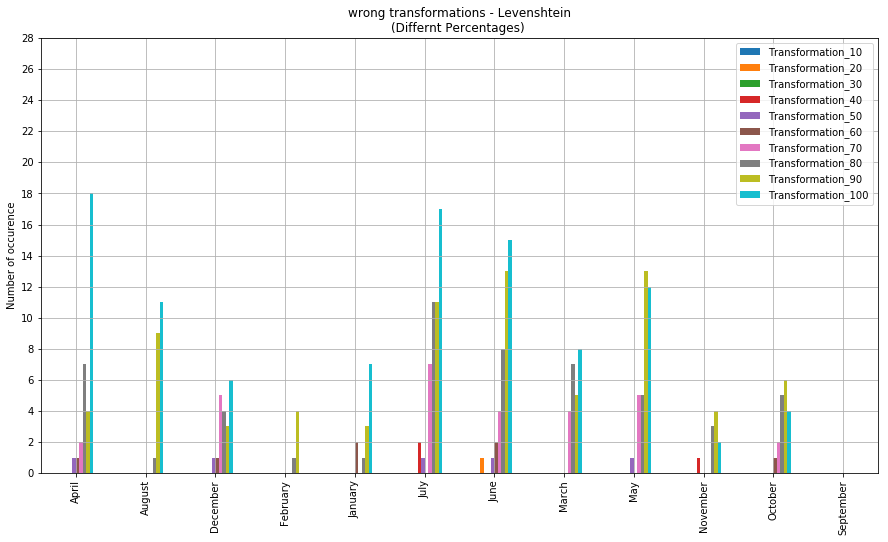

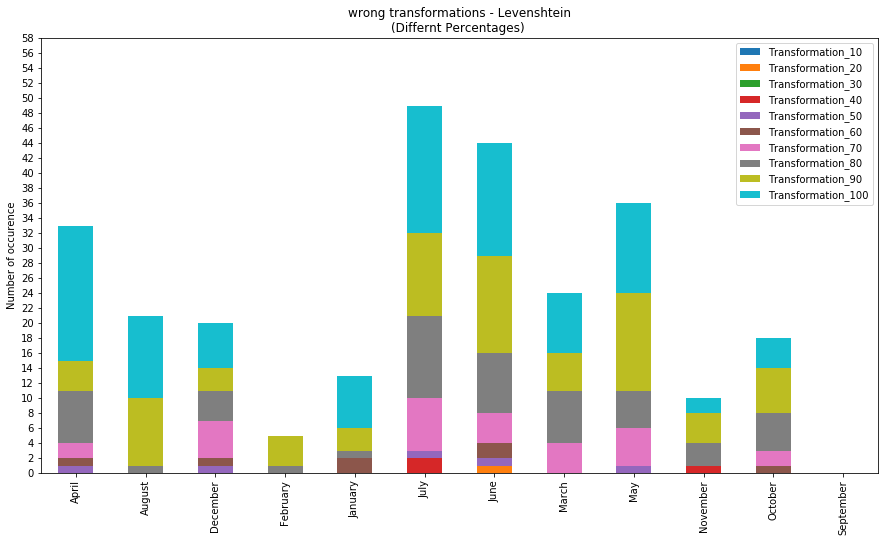

In [8]:
wrong = diff.apply(pd.Series.value_counts)
wrong = wrong.drop(wrong.index[0])
del wrong['Original']
wrong
wrong.plot.bar(figsize=(15, 8))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Levenshtein\n(Differnt Percentages) ')
plt.yticks(range(0 , 30 ,2))
plt.grid()
wrong.plot.bar(figsize=(15, 8) ,stacked=True)
plt.yticks(range(0 , 60 ,2))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Levenshtein\n(Differnt Percentages) ')
plt.show()

In [9]:
#Creating an empty DataFrame
columns = ['Original']
Result = pd.DataFrame(index=range(0,266) , columns=columns)
Result['Noisy Form'] = ''
Result['Transfromation'] = ''
#Iterate ove the transformed columns 
per = [10 , 20 ,  40 , 50 , 60 , 70 , 80 , 90 , 100]

for p in percentage:
    c = np.where(df['STD_Months'] != df[str(p) +'_Percent_LD'])
    
    if(len(c[0])>0):
        print(str(p) + '_Percent')             
        for ind in np.nditer(c):            
            ind = int(ind)
            x = diff['Original'].iloc[ind]
            y = diff['Transformation_' + str(p)].iloc[ind]
            z = df[str(p) + '_Percent'].iloc[ind]
            Result['Original'].iloc[ind] = x
            Result['Noisy Form'].iloc[ind] = z
            Result['Transfromation'].iloc[ind] = y                   
            print('{} To {}'.format(x , y))
            print('Noisy form:' , z)
            print('\n')
        print('********') 

20_Percent
July To June
Noisy form: Jule


********
40_Percent
June To July
Noisy form: Juln


June To July
Noisy form: Jubx


September To November
Noisy form: uevmemqer


********
50_Percent
January To July
Noisy form: Janjlyh


November To December
Noisy form: crewmber


March To April
Noisy form: tprnh


July To June
Noisy form: Juaf


July To May
Noisy form: Jtay


********
60_Percent
November To October
Noisy form: gubwuber


November To December
Noisy form: jdxevher


August To April
Noisy form: Auhizp


February To June
Noisy form: cexrunen


February To January
Noisy form: meaifdry


July To June
Noisy form: Jucb


February To January
Noisy form: cgbnkzry


********
70_Percent
September To December
Noisy form: ecmtemznr


January To May
Noisy form: nqvaaoy


April To July
Noisy form: upyyp


November To December
Noisy form: fncenllr


April To March
Noisy form: abrce


June To July
Noisy form: Jfoo


April To June
Noisy form: zcrne


January To June
Noisy form: jinehfy


Febru

In [10]:
Result

,Original,Noisy Form,Transfromation
0,September,vdomntnrh,January
1,January,ykcququ,July
2,April,scvum,May
3,NaN,,
4,September,rhazmcowx,March
5,April,vplum,July
6,December,wddccwkh,March
7,November,xxrcjynf,March
8,January,sryvywk,May
9,March,eyawb,May


In [11]:
grouped = Result.groupby(['Original' , 'Transfromation'])
new = grouped.size().unstack()
new

Transfromation,April,August,December,January,July,June,March,May,November,October
Original,,,,,,,,,,
April,NaN,1.0,NaN,NaN,4.0,2.0,1.0,2.0,NaN,NaN
August,4.0,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,1.0
December,2.0,NaN,NaN,3.0,1.0,NaN,3.0,NaN,NaN,1.0
February,1.0,5.0,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN
January,3.0,1.0,1.0,NaN,1.0,3.0,NaN,1.0,NaN,NaN
July,NaN,NaN,NaN,NaN,NaN,7.0,NaN,3.0,NaN,NaN
June,3.0,NaN,NaN,NaN,5.0,NaN,NaN,2.0,NaN,NaN
March,1.0,1.0,NaN,NaN,3.0,1.0,NaN,3.0,NaN,NaN
May,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


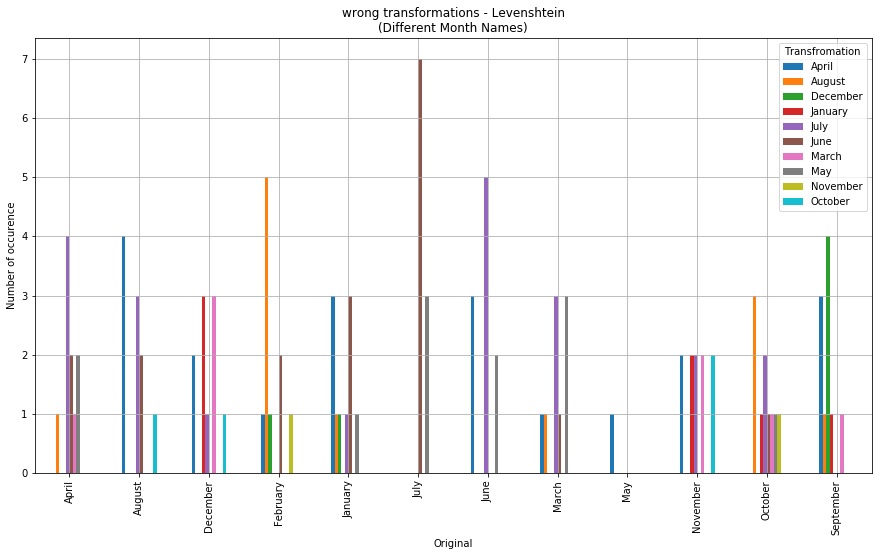

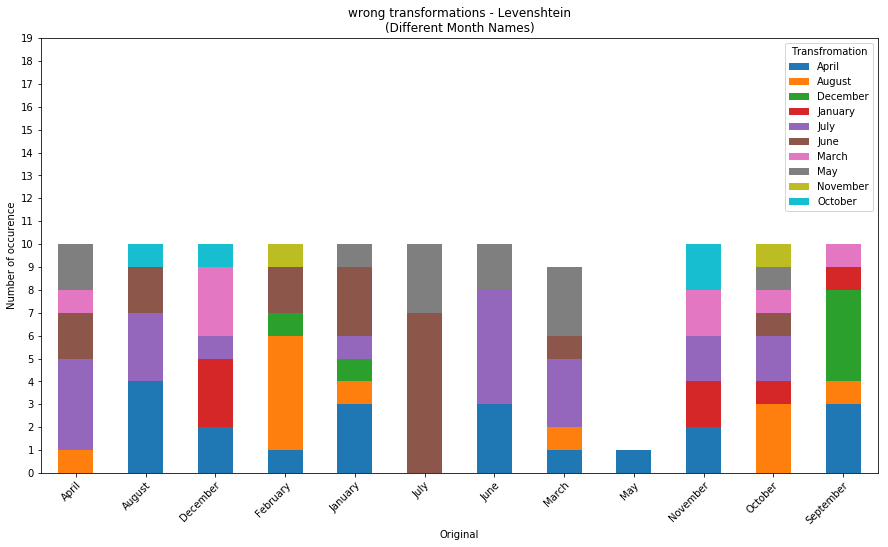

In [12]:

new.plot.bar(figsize=(15, 8))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Levenshtein\n(Different Month Names)')
plt.grid()
new.plot.bar(figsize=(15, 8) ,stacked=True)
plt.xticks(rotation='45', rotation_mode='anchor', ha='right')
plt.yticks(range(0 , 20))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Levenshtein\n(Different Month Names)')
plt.show()

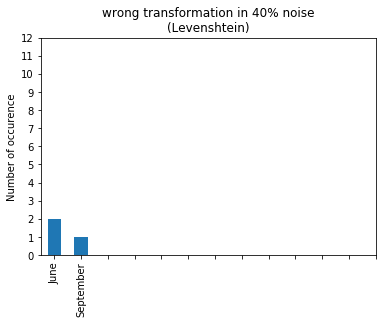

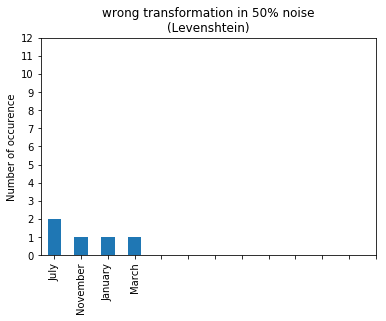

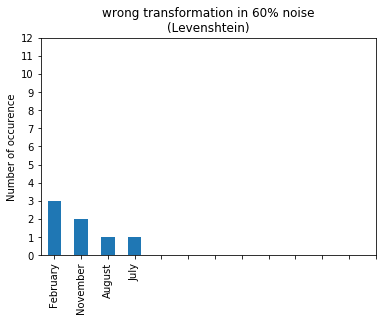

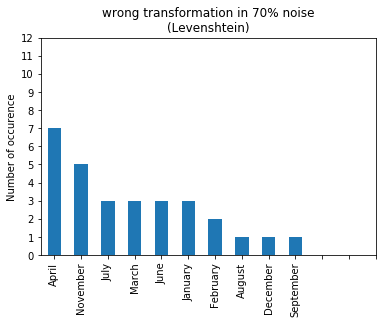

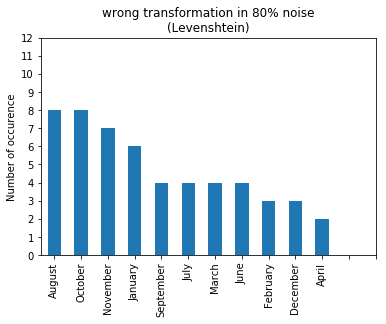

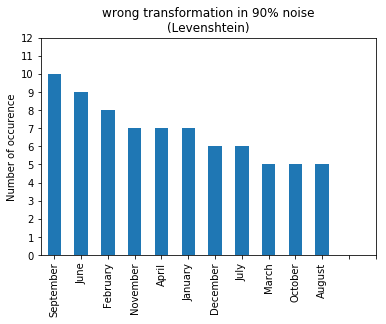

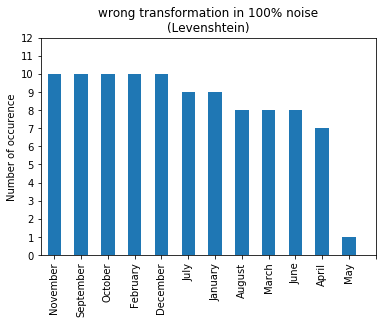

In [13]:
import numpy as np

#Iterate ove the transformed columns 
percentage = [40 , 50 , 60 , 70 , 80 , 90 , 100]

for p in percentage:
    c = np.where(df['STD_Months'] != df[str(p) +'_Percent_LD'])
    columns = ['Original' , 'Transformation']
    diff = pd.DataFrame(index=range(0,121) , columns=columns)
    diff['Transformation_' + str(p)] = ''
    diff[str(p) + '_Percent'] = ''
    for x in np.nditer(c):
        x = int(x)
        diff['Original'].iat[x] = df['STD_Months'].iat[x]
        diff[str(p) + '_Percent'].iat[x] = df[str(p) + '_Percent'].iat[x]
        diff['Transformation'].iat[x] = df[str(p) + '_Percent_LD'].iat[x]
    diff.dropna()
    wrongTransform = diff['Original'].value_counts()
    wrongTransform.plot.bar()
    plt.yticks(range(0 , 13))
    plt.ylabel('Number of occurence')
    plt.title('wrong transformation in {}% noise\n(Levenshtein)'.format(p))
    plt.xticks(range(0,13))
    plt.show()

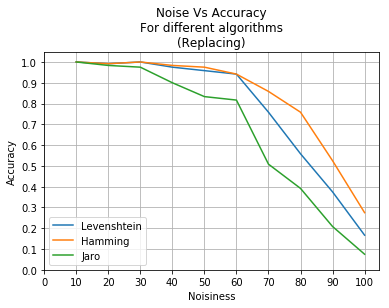

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
x = [10,20,30,40,50,60,70,80,90,100]
yLD=LdAccuracy
yHamming=[1.0, 0.9916666666666667, 1.0, 0.98333333333333328, 0.97499999999999998, 0.94166666666666665, 0.85833333333333328, 0.7583333333333333, 0.52500000000000002, 0.27500000000000002]
yJaro=[1.0, 0.98333333333333328, 0.97499999999999998, 0.90000000000000002, 0.83333333333333337, 0.81666666666666665, 0.5083333333333333, 0.39166666666666666, 0.20833333333333334, 0.074999999999999997]
plt.plot(x,yLD , label = 'Levenshtein')
plt.plot(x,yHamming , label = 'Hamming')
plt.plot(x,yJaro , label = 'Jaro')
#Add title and label
plt.xlabel('Noisiness')
plt.ylabel('Accuracy')
plt.title('Noise Vs Accuracy\nFor different algorithms\n(Replacing)')
plt.xticks(np.arange(0 , 110 , 10))
plt.yticks(np.arange(0 , 1.1 , 0.1))
plt.legend()
plt.grid()
plt.show()